# Лабораторная работа №2

## Метод k-ближайших соседей
#### Фазылова Алика группа:5140201/30301

### Задание 1
Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации или на вероятность ошибочной классификации в примере крестики-нолики и примере о спаме e-mail сообщений. 

### Обучающее множество: Tic Tac Toe (крестики-нолики)


In [242]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from statsmodels.sandbox.nonparametric import kernels

In [243]:
# Импортируем данные
data = pd.read_csv("Tic_tac_toe.txt", sep=",")

# Выделим признаки и классы
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Проведем кодирование категориальных данных
X = X.replace(['x', 'o', 'b'],[0,1,2])
y = y.replace(['negative', 'positive'],[0,1])


for train_size in range(10, 91, 10):
    # Разделим на обучающую и тестовую выборки,их размеры меняются с циклом
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=34543)
    
    # Используем модель к-ближайших соседей (количество соседей 21)
    classifier = KNeighborsClassifier(n_neighbors=21,weights='distance')
    classifier.fit(X_train, y_train)

    # Проведем прогнозирование на тестовой выборке 
    predict = classifier.predict(X_test)

    # Оценим полученную модель
    accuracy = round((accuracy_score(y_test, predict))*100,2)
    print(f"Для размера обучающей выборки: {train_size}%, точность модели составляет: {accuracy}%")

Для размера обучающей выборки: 10%, точность модели составляет: 67.52%
Для размера обучающей выборки: 20%, точность модели составляет: 69.58%
Для размера обучающей выборки: 30%, точность модели составляет: 75.22%
Для размера обучающей выборки: 40%, точность модели составляет: 81.74%
Для размера обучающей выборки: 50%, точность модели составляет: 79.96%
Для размера обучающей выборки: 60%, точность модели составляет: 75.98%
Для размера обучающей выборки: 70%, точность модели составляет: 74.31%
Для размера обучающей выборки: 80%, точность модели составляет: 79.17%
Для размера обучающей выборки: 90%, точность модели составляет: 86.46%


### Обучающее множество: Данные о спаме e-mail сообщений

In [244]:
# Импортируем данные 
data = fetch_openml(data_id=44,parser='auto')

# Преобразовываем в DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Выделим признаки и классы
X = df.drop(columns=['target'])
y = df['target']

for train_size in range(10, 91, 10):
    # Разделим на обучающую и тестовую выборки,их размеры меняются с циклом
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, random_state=1232221)

    # Используем модель к-ближайших соседей (количество соседей 31)
    classifier = KNeighborsClassifier(n_neighbors=31,weights='distance')
    classifier.fit(X_train.values, y_train.values)

    # Проведем прогнозирование на тестовой выборке 
    predict = classifier.predict(X_test.values)

    # Оценим полученную модель
    accuracy = round((accuracy_score(y_test, predict))*100,2)
    print(f"Для размера обучающей выборки: {train_size}%, точность модели составляет: {accuracy}%")



Для размера обучающей выборки: 10%, точность модели составляет: 72.62%
Для размера обучающей выборки: 20%, точность модели составляет: 74.35%
Для размера обучающей выборки: 30%, точность модели составляет: 77.12%
Для размера обучающей выборки: 40%, точность модели составляет: 78.7%
Для размера обучающей выборки: 50%, точность модели составляет: 78.57%
Для размера обучающей выборки: 60%, точность модели составляет: 78.76%
Для размера обучающей выборки: 70%, точность модели составляет: 80.23%
Для размера обучающей выборки: 80%, точность модели составляет: 81.11%
Для размера обучающей выборки: 90%, точность модели составляет: 82.65%


### Задание 2
Постройте классификатор для обучающего множества Glass, данные которого характеризуются 10-ю признаками: 
  1. Id number: 1 to 214; 2. RI: показатель преломления; 3. Na: сода (процент содержания в соотвествующем оксиде); 4. Mg; 5. Al; 6. Si; 7. K; 8. Ca; 9. Ba; 10. Fe.
Классы характеризуют тип стекла:
  (1) окна зданий, плавильная обработка
  (2) окна зданий, не плавильная обработка
  (3) автомобильные окна, плавильная обработка
  (4) автомобильные окна, не плавильная обработка (нет в базе)
  (5) контейнеры
  (6) посуда
  (7) фары
Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки. Это выполняется командой glass <- glass[,-1].
Постройте графики зависимости ошибки классификации от значения k и от типа ядра. 
Исследуйте, как тип метрики расстояния (параметр distance) влияет на точность классификации.
Определите, к какому типу стекла относится экземпляр с характеристиками 
RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1 
Определите, какой из признаков оказывает наименьшее влияние на определение класса путем последовательного исключения каждого признака. 

In [245]:
data = pd.read_csv("glass.csv", sep=",")
data = data.drop(columns=['Id'])

# Выделим признаки и классы
X = data.drop(columns=['Type of glass'])
y = data['Type of glass']
# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42798)

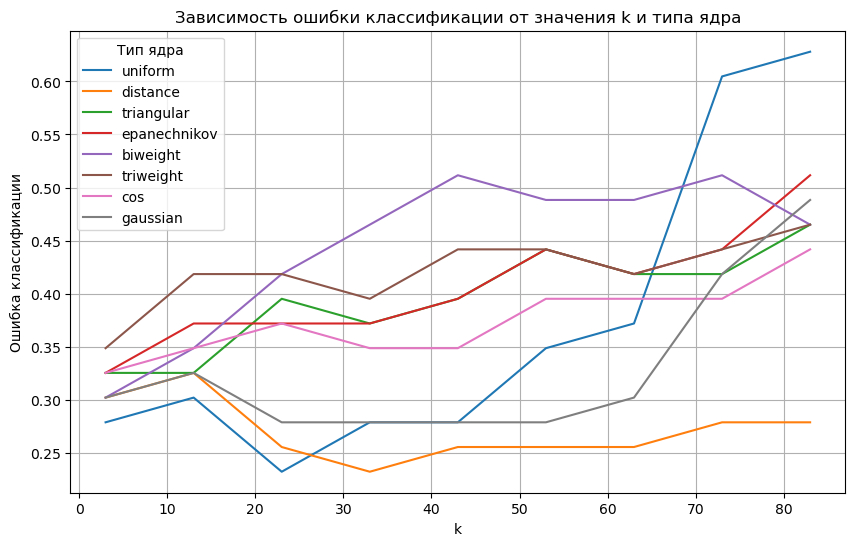

In [246]:
# Функция для вычисления ошибки классификации
def error_calc(k, kernel):
    if kernel in ['uniform', 'distance']:
        weights = kernel
    else:
        weights = kernel()
    classifier = KNeighborsClassifier(n_neighbors=k, weights=weights)
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_test)
    return 1 - accuracy_score(y_test, predict)

# Создание списка значений k
k_values = list(range(3, 84, 10))

# Словарь (тип ядра:функция ядра)
kernel_func = {
    'uniform': 'uniform',
    'distance': 'distance',
    'triangular': kernels.Triangular,
    'epanechnikov': kernels.Epanechnikov,
    'biweight': kernels.Biweight,
    'triweight': kernels.Triweight,
    'cos': kernels.Cosine,
    'gaussian': kernels.Gaussian
}

# Список ключей из словаря типов ядра
kernel_types = list(kernel_func.keys())

# Выделяем нулевую матрицу для ошибок
errors = np.zeros((len(k_values), len(kernel_types)))
# Подсчитываем ошибки
for i, k in enumerate(k_values):
    for j, kernel in enumerate(kernel_types):
        error = error_calc(k, kernel_func[kernel])
        errors[i, j] = error

# Построение графика зависимости ошибки классификации от значения k и типа ядра
plt.figure(figsize=(10, 6))
for j, kernel in enumerate(kernel_types):
    plt.plot(k_values, errors[:, j], label=str(kernel))
plt.xlabel('k')
plt.ylabel('Ошибка классификации')
plt.title('Зависимость ошибки классификации от значения k и типа ядра')
plt.legend(title='Тип ядра')
plt.grid(True)
plt.show()


Исследуйте, как тип метрики расстояния влияет на точность классификации

In [247]:
# Функция для вычисления точности классификации
def accuracy_func(k, distance_metric,weights):
    classifier = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=distance_metric)
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_test)
    return accuracy_score(y_test, predict)

In [248]:
def k_distance_func(weights,title):
    # Создание списка значений k
    k_values = list(range(3, 84, 10))

    # Список типов метрики расстояния
    distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

    # Выделяем нулевую матрицу для точности
    accuracies = np.zeros((len(k_values), len(distance_metrics)))
    # Подсчитываем точность
    for i, k in enumerate(k_values):
        for j, distance_metric in enumerate(distance_metrics):
            accuracy = accuracy_func(k, distance_metric,weights)
            accuracies[i, j] = accuracy

    # Построение графика 
    plt.figure(figsize=(10, 6))
    for j, distance_metric in enumerate(distance_metrics):
        plt.plot(k_values, accuracies[:, j], label=distance_metric)
    plt.xlabel('k')
    plt.ylabel('Точность классификации')
    plt.title(f'Зависимость точности классификации от значения k и типа метрики расстояния для ядра:{title}')
    plt.legend(title="Метрики расстояния")
    plt.grid(True)
    plt.show()

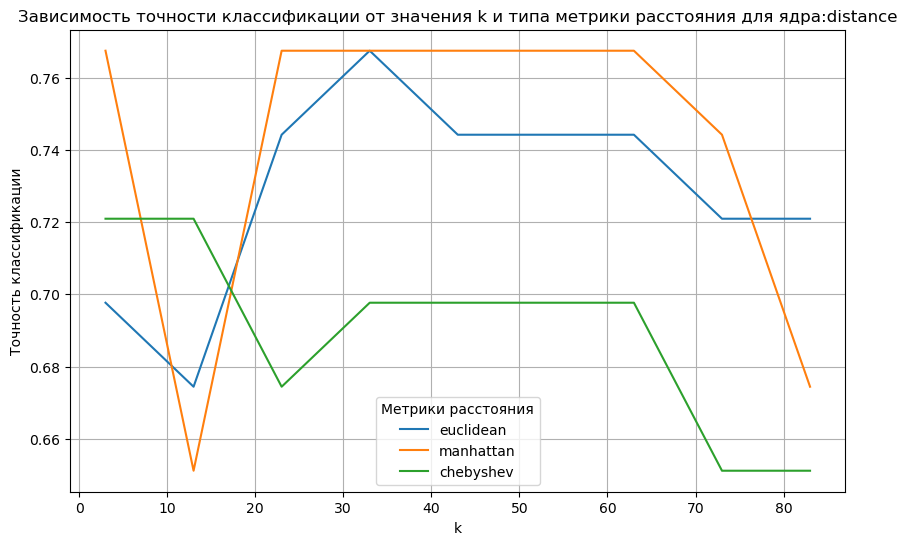

In [249]:
k_distance_func('distance','distance')

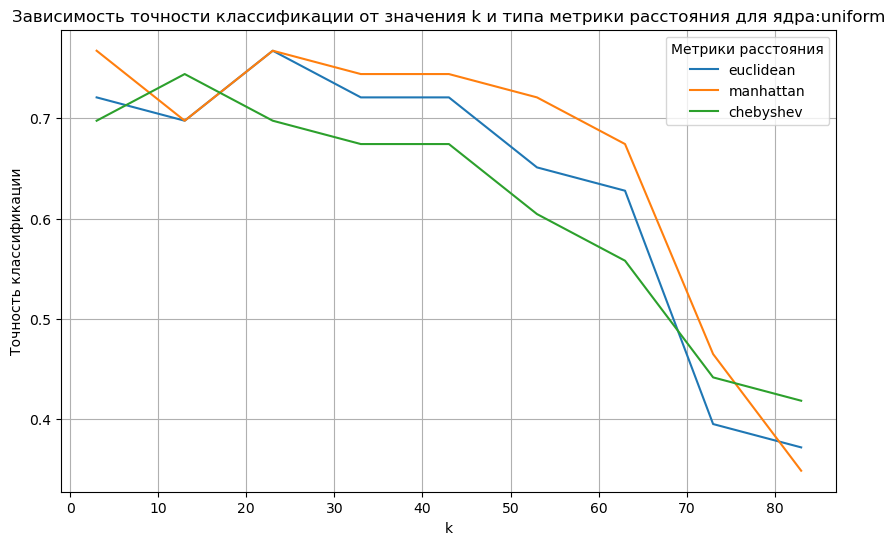

In [250]:
k_distance_func('uniform','uniform')

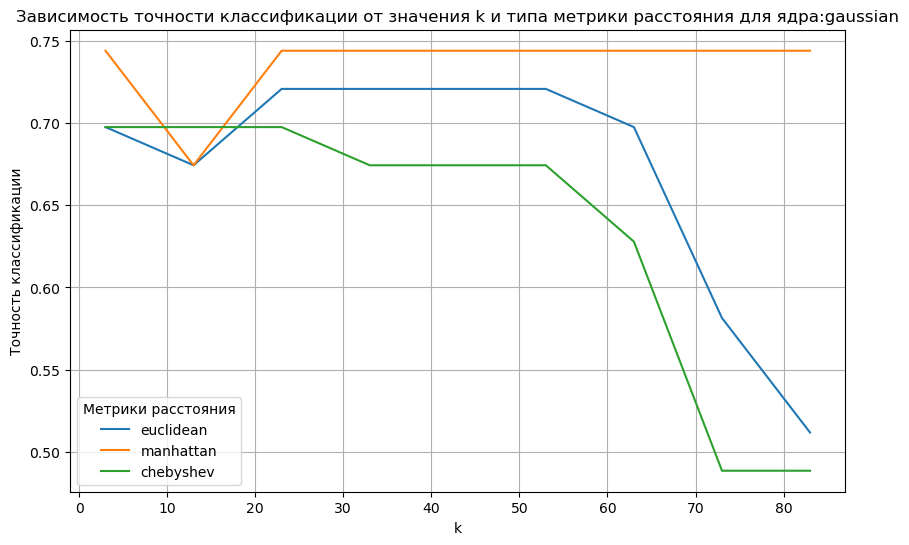

In [251]:
k_distance_func(kernels.Gaussian(),'gaussian')

Определите, к какому типу стекла относится экземпляр с характеристиками 
RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1 

In [252]:
# Найдем оптимальное K
# Находим индекс столбца, соответствующего типу ядра 'uniform'
uniform_index = kernel_types.index('uniform')

# Найдем минимальную ошибку и ее индекс 
min_error = np.min(errors[:, uniform_index])
min_error_index = np.argmin(errors[:, uniform_index])

# Найдем k, соответствующее минимальной ошибке
min_error_k = k_values[min_error_index]

print(f"Минимальная ошибка для равномерного распределения: {min_error} достигается при k = {min_error_k}")


Минимальная ошибка для равномерного распределения: 0.2325581395348837 достигается при k = 23


In [253]:
# Экземпляр для классификации
glass = [[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]]

# модель классификации
classifier = KNeighborsClassifier(n_neighbors=min_error_k, weights='uniform')
classifier.fit(X_train.values, y_train.values)

predict = classifier.predict(glass)

print(f'Экземпляр относится к {predict[0]} классу стекла')

Экземпляр относится к 5 классу стекла


Определите, какой из признаков оказывает наименьшее влияние на определение класса путем последовательного исключения каждого признака

In [254]:
knn_classifier= KNeighborsClassifier(n_neighbors=min_error_k,weights='uniform')

# Первоначальная точность
accuracy=accuracy_func(min_error_k,'euclidean','uniform')

# Список для сохранения точности после исключения определенных признаков
accuracy_changes = []

for i in range(9):  
    X_train_modified = pd.DataFrame(X_train).drop(X_train.columns[i], axis=1)  # Удаление признака (i) из обучающих данных
    X_test_modified = pd.DataFrame(X_test).drop(X_test.columns[i], axis=1)  # Удаление признака (i) из тестовых данных

    knn_classifier.fit(X_train_modified, y_train)  # Обучение модели без i-го признака
    predict = knn_classifier.predict(X_test_modified)  
# Точность классификации после удаления
    accuracy_modified = accuracy_score(y_test, predict)  
    accuracy_changes.append(accuracy-accuracy_modified)

df = pd.DataFrame({'Признаки':X.columns, 'Влияние':accuracy_changes})
print(df)

# Нахождение минимального изменения точности
min_accuracy = min(accuracy_changes)

# Проверка на несколько признаков
min_accuracy_features = df[df['Влияние'] == min_accuracy]['Признаки'].tolist()

print("Наименьшее влияние оказывают признаки:", min_accuracy_features)

  Признаки   Влияние
0       RI  0.000000
1       Na  0.046512
2       Mg  0.069767
3       Al  0.046512
4       Si  0.069767
5        K  0.023256
6       Ca  0.046512
7       Ba  0.023256
8       Fe  0.000000
Наименьшее влияние оказывают признаки: ['RI', 'Fe']


### Задание 3
Для построения классификатора используйте заранее сгенерированные обучающие и тестовые выборки, хранящиеся в файлах svmdata4.txt, svmdata4test.txt. Найдите оптимальное значение k, обеспечивающее наименьшую ошибку классификации. Посмотрите, как выглядят данные на графике

Лучшее значение параметра k: 3
Точность модели составляет: 93.5%


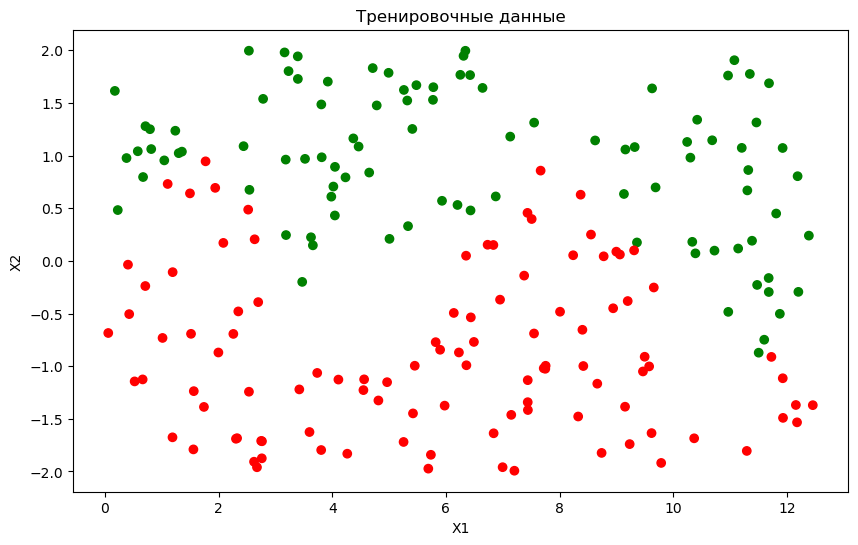

In [255]:
svm4_train = pd.read_csv("svmdata4.txt", sep="	")
svm4_test = pd.read_csv("svmdata4test.txt", sep="	")

# Выделим признаки и классы
X_train = svm4_train.drop(columns=["Colors"])
y_train = svm4_train["Colors"]

X_test = svm4_test.drop(columns=["Colors"])
y_test = svm4_test["Colors"]

# Количество соседей
k = {'n_neighbors': range(3, 33,2)}

# Кроссвалидация для KNN
grid_search = GridSearchCV(KNeighborsClassifier(), k, cv=10)
grid_search.fit(X_train, y_train)

# Наиболее оптимальное значение параметра k
Best_k = grid_search.best_params_['n_neighbors']
print("Лучшее значение параметра k:", Best_k)

# Предсказание с наилучшем k
y_pred = grid_search.predict(X_test)

# Вычисиление точности
accuracy = round((accuracy_score(y_test, y_pred))*100,2)
print(f"Точность модели составляет: {accuracy}%")

# Построение графика на тренировочных данных
plt.figure(figsize=(10, 6))
colors = {"red": "red", "green": "green"}
plt.scatter(X_train["X1"], X_train["X2"], c=y_train.map(colors))
plt.title("Тренировочные данные")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()





### Задание 4
Разработать классификатор на основе метода ближайших соседей для данных Титаник (Titanic dataset) - https://www.kaggle.com/c/titanic
Исходные обучающие данные для классификации – в файле Titanic_train.csv
Данные для тестирования – в файле Titanic_test.csv


In [256]:
# Чтение данных
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Объединим выборки
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Проведем предварительную подготовку данных

# Удалим столбцы, не учавствующие в анализе
combined_data.drop(columns=["PassengerId","Name", "Ticket", "Cabin" ],inplace=True)

# Заполним недостающие данные
combined_data['Age'].fillna(combined_data['Age'].mean(), inplace=True)
combined_data['Fare'].fillna(combined_data['Fare'].mean(), inplace=True)
combined_data["Embarked"].fillna(combined_data["Embarked"].mode()[0], inplace=True)

# Кодируем категориальные признаки
combined_data['Sex'] = LabelEncoder().fit_transform(combined_data['Sex'])
combined_data['Embarked'] = LabelEncoder().fit_transform(combined_data['Embarked'])

# Разделим выборки
train_data1 = combined_data[:891]
test_data1 = combined_data[891:].reset_index(drop=True)

# Выделим признаки и классы
X_train = train_data1.drop(columns=["Survived"])
y_train = train_data1["Survived"]

X_test = test_data1.drop(columns=["Survived"])
y_test = test_data1["Survived"]


# Количество соседей
k = {'n_neighbors': range(3, 33,2)}

# Кроссвалидация для модели KNN
grid_search = GridSearchCV(KNeighborsClassifier(), k, cv=10)
grid_search.fit(X_train, y_train)

# Наиболее оптимальное значение параметра k
Best_k = grid_search.best_params_['n_neighbors']
print("Лучшее значение параметра k:", Best_k)

# Предсказание с наилучшем k
y_pred = grid_search.predict(X_test)

survived = sum(y_pred)
died = len(y_pred)-survived
print("Выживших:", int(survived))
print ("Умерших:", int(died))

# Оценим точность модели на тренировочных данных
accuracy_t = round(grid_search.score(X_train, y_train) * 100, 2)
print (f"Точность модели на тренировочных данных: {accuracy_t}%")

Лучшее значение параметра k: 3
Выживших: 159
Умерших: 259
Точность модели на тренировочных данных: 83.61%
